## Task 1.2 (Supervised Learning) - Predicting Adoption Speed

2. **Predicting AdoptionSpeed (multiclass classification)**: in this task you should you the original target AdoptionSpeed, whose values are in the set {0, 1, 2, 3 , 4} (5 classes). This is a very difficult problem. You might also want to consider 3 classes (for instance {0-1, 2-3, 4}, or other sets that make sense). 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas_profiling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import itertools
from nltk import NaiveBayesClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsClassifier
from textblob import TextBlob
from sklearn.ensemble import AdaBoostClassifier , VotingClassifier
from sklearn import preprocessing
from sklearn import tree
import warnings
import pydot
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE,ADASYN,SMOTENC
from collections import Counter
import random
from IPython.display import HTML, display
%matplotlib inline
warnings.filterwarnings('ignore')
from imblearn.under_sampling import TomekLinks

## Read the preprocessed dataset

In [2]:
PetFinder_dataset = pd.read_csv("PetFinder_dataset_pp.csv")

In [3]:
MulticlassClassification = PetFinder_dataset.drop(['Adopted','InitialAdoptionSpeed','AgeBin','FeeBin','PhotoAmtBin','PolarityBin','DescwordsBin','SubjectivityBin'],axis=1).copy(deep=True)

In [4]:
MulticlassClassification.head(3)

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,PhotoAmt,Hasname,Breed,Color,Polarity,Subjectivity,DescWords,AdoptionSpeed
0,Cat,3,Male,Small,Short,No,No,No,Healthy,1,100,Selangor,1.0,1,Purebreed,BlackOther,0.130357,0.407143,69,instant adoption
1,Cat,1,Male,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Kuala Lumpur,2.0,0,Domestic,BlackOther,0.100000,0.400000,23,instant adoption
2,Dog,1,Male,Medium,Medium,Yes,Yes,No,Healthy,1,0,Selangor,7.0,1,Mixed Breed,BrownOther,0.261905,0.542857,69,delayed adoption


### Converted 5 class Problem to 3 class by binning and Performed Data Analysis against the target variable

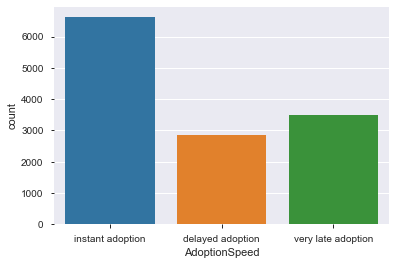

In [5]:
sns.countplot(x=MulticlassClassification['AdoptionSpeed'])
plt.show()

In [6]:
MulticlassClassification['AdoptionSpeed'].value_counts()


instant adoption      6620
very late adoption    3508
delayed adoption      2859
Name: AdoptionSpeed, dtype: int64

## Perform undersampling of the majority classes.
Under Sampling will be performed.

In [7]:
n = min(MulticlassClassification[MulticlassClassification['AdoptionSpeed']=='instant adoption']['AdoptionSpeed'].count(),
   MulticlassClassification[MulticlassClassification['AdoptionSpeed']=='delayed adoption']['AdoptionSpeed'].count(),
   MulticlassClassification[MulticlassClassification['AdoptionSpeed']=='very late adoption']['AdoptionSpeed'].count())
sample_instant = MulticlassClassification.ix[MulticlassClassification.AdoptionSpeed == 'instant adoption'].sample(n=n, replace=True, random_state=None)
sample_delayed = MulticlassClassification.ix[MulticlassClassification.AdoptionSpeed == 'delayed adoption'].sample(n=n, replace=True, random_state=None)
sample_late = MulticlassClassification.ix[MulticlassClassification.AdoptionSpeed == 'very late adoption'].sample(n=n, replace=True, random_state=None)

MulticlassClassification = pd.concat([sample_instant, sample_delayed ,sample_late])
labels=['instant adoption', 'delayed adoption' ,'very late adoption']

In [8]:
MulticlassClassification.isna().sum()

Type             0
Age              0
Gender           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
PhotoAmt         0
Hasname          0
Breed            0
Color            0
Polarity         0
Subjectivity     0
DescWords        0
AdoptionSpeed    0
dtype: int64

In [9]:
mm_scaler = preprocessing.MinMaxScaler()
MulticlassClassification[['Age','Quantity' , 'Fee' , 'PhotoAmt','DescWords']] = mm_scaler.fit_transform(MulticlassClassification[['Age','Quantity' , 'Fee' , 'PhotoAmt','DescWords']])

In [10]:
MulticlassClassification.head(3)

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,PhotoAmt,Hasname,Breed,Color,Polarity,Subjectivity,DescWords,AdoptionSpeed
9845,Dog,0.003922,Male,Small,Short,Not Sure,Not Sure,Not Sure,Healthy,1.0,0.0,Kuala Lumpur,0.066667,1,Mixed Breed,BlackOther,0.301190,0.419048,0.031822,instant adoption
5358,Dog,0.003922,Male,Medium,Medium,No,No,No,Healthy,0.0,0.0,Pulau Pinang,0.033333,0,Mixed Breed,BlackOther,-0.125000,0.550000,0.017502,instant adoption
9795,Cat,0.015686,Female,Medium,Medium,No,Yes,No,Healthy,0.0,0.0,Selangor,0.066667,1,Mixed Breed,White,0.361111,0.550000,0.067621,instant adoption


In [11]:
y = MulticlassClassification['AdoptionSpeed']

In [12]:
MulticlassClassification.drop([ 'AdoptionSpeed'], axis=1 , inplace=True)

In [13]:
one_hot = pd.get_dummies(MulticlassClassification)

In [14]:
one_hot

,Age,Quantity,Fee,PhotoAmt,Hasname,Polarity,Subjectivity,DescWords,Type_Cat,Type_Dog,...,Color_BrownOther,Color_Cream,Color_CreamOther,Color_Golden,Color_GoldenOther,Color_Gray,Color_GrayOther,Color_White,Color_Yellow,Color_YellowOther
9845,0.003922,1.0,0.0,0.066667,1,0.301190,0.419048,0.031822,0,1,...,0,0,0,0,0,0,0,0,0,0
5358,0.003922,0.0,0.0,0.033333,0,-0.125000,0.550000,0.017502,0,1,...,0,0,0,0,0,0,0,0,0,0
9795,0.015686,0.0,0.0,0.066667,1,0.361111,0.550000,0.067621,1,0,...,0,0,0,0,0,0,0,1,0,0
6942,0.023529,0.0,0.0,0.166667,1,0.145833,0.779630,0.007955,1,0,...,0,0,0,0,0,0,1,0,0,0
10235,0.007843,0.0,0.0,0.100000,1,0.000000,0.000000,0.053302,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,0.027451,0.0,0.0,0.033333,1,0.000000,0.000000,0.003978,0,1,...,0,0,0,0,0,0,0,0,0,0
3276,0.047059,0.0,0.0,0.133333,1,0.500000,0.500000,0.010342,0,1,...,0,0,0,0,0,0,0,0,0,0
11530,0.023529,0.0,0.0,0.033333,1,0.266667,0.583333,0.023866,0,1,...,0,0,0,0,0,0,0,0,0,0
5850,0.007843,0.0,0.0,0.033333,1,0.406667,0.690833,0.027844,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(one_hot, y, test_size=0.20, shuffle = True)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 1.2. Learning Classifiers

### Decision Tree Classifier

In [17]:
# Set the parameters by cross-validation
tuned_parameters = [{'criterion':['gini','entropy'],'max_leaf_nodes': [20,40,80]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_DTC = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    clf_DTC.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(clf_DTC.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = clf_DTC.cv_results_['mean_test_score']
    stds = clf_DTC.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_DTC.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = clf_DTC.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'criterion': 'entropy', 'max_leaf_nodes': 80}

Grid scores on Train set:

0.480 (+/-0.015) for {'criterion': 'gini', 'max_leaf_nodes': 20}
0.494 (+/-0.019) for {'criterion': 'gini', 'max_leaf_nodes': 40}
0.506 (+/-0.030) for {'criterion': 'gini', 'max_leaf_nodes': 80}
0.482 (+/-0.023) for {'criterion': 'entropy', 'max_leaf_nodes': 20}
0.487 (+/-0.022) for {'criterion': 'entropy', 'max_leaf_nodes': 40}
0.509 (+/-0.015) for {'criterion': 'entropy', 'max_leaf_nodes': 80}

Detailed classification report on Test Set:
                    precision    recall  f1-score   support

  instant adoption       0.50      0.38      0.43       580
  delayed adoption       0.48      0.50      0.49       582
very late adoption       0.48      0.58      0.52       554

          accuracy                           0.49      1716
         macro avg       0.49      0.49      0.48      1716
      weighted avg       0.49      0.4

In [18]:
clf_DTC = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=80)
clf_DTC.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_DTC, out_file="clf_DTC.dot",
                                feature_names=one_hot.columns,
                                class_names=labels,
                                filled=True, rounded=True,
                                special_characters=True)
(clf_DTC_graph,) = pydot.graph_from_dot_file('clf_DTC.dot')
clf_DTC_graph.write_png('clf_DTC.png')
display(HTML('<img src="clf_DTC.png?%d" alt="clf_DTC.png" height="100">' % random.randint(0,2e9)))

Confusion matrix, without normalization


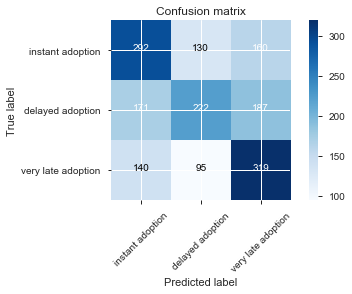

In [19]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Linear SVM

In [20]:
# Set the parameters by cross-validation
tuned_parameters = [{'loss':['hinge','squared_hinge'],'alpha': 10.0**-np.arange(1,7),'penalty':['l2','l1']}]

scores = ['precision_macro']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    sgd_clf = GridSearchCV(
        SGDClassifier(max_iter= np.ceil(10**6 / X_train.shape[0])), tuned_parameters, cv=5, scoring='%s' % score)
    sgd_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(sgd_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = sgd_clf.cv_results_['mean_test_score']
    stds = sgd_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, sgd_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = sgd_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for precision_macro

Best parameters set found on Train set:

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}

Grid scores on Train set:

0.469 (+/-0.053) for {'alpha': 0.1, 'loss': 'hinge', 'penalty': 'l2'}
0.111 (+/-0.001) for {'alpha': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
0.394 (+/-0.045) for {'alpha': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.405 (+/-0.040) for {'alpha': 0.1, 'loss': 'squared_hinge', 'penalty': 'l1'}
0.445 (+/-0.023) for {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
0.324 (+/-0.169) for {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
0.405 (+/-0.021) for {'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.398 (+/-0.028) for {'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'l1'}
0.458 (+/-0.048) for {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
0.478 (+/-0.043) for {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
0.392 (+/-0.016) for {'alpha': 0.001, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.392 (+/-0.0

Confusion matrix, without normalization


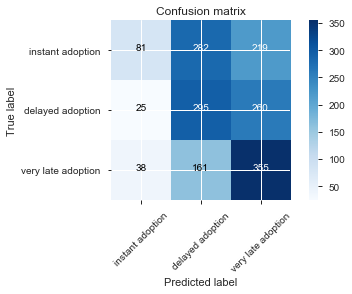

In [21]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Logistic Regression

In [22]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': 10.0**np.arange(0,7),'penalty':['l2','l1'],'solver':['liblinear','lbfgs']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    lr_clf = GridSearchCV(
        LogisticRegression(max_iter= np.ceil(10**6 / X_train.shape[0])), tuned_parameters, cv=5, scoring='%s' % score)
    lr_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(lr_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = lr_clf.cv_results_['mean_test_score']
    stds = lr_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, lr_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = lr_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}

Grid scores on Train set:

0.464 (+/-0.022) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.466 (+/-0.021) for {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.466 (+/-0.016) for {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.468 (+/-0.017) for {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.467 (+/-0.015) for {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.467 (+/-0.017) for {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.468 (+/-0.018) for {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.468 (+/-0.017) for {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.468 (+/-0.017) for {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 100.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.

Confusion matrix, without normalization


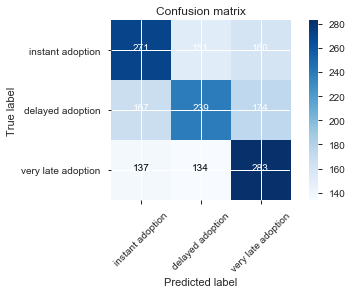

In [23]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Random Forest Classifier

In [24]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [400,500]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    rf_clf = GridSearchCV(
        RandomForestClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    rf_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(rf_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = rf_clf.cv_results_['mean_test_score']
    stds = rf_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, rf_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = rf_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'n_estimators': 400}

Grid scores on Train set:

0.713 (+/-0.013) for {'n_estimators': 400}
0.710 (+/-0.016) for {'n_estimators': 500}

Detailed classification report on Test Set:
                    precision    recall  f1-score   support

  instant adoption       0.79      0.71      0.74       580
  delayed adoption       0.68      0.69      0.68       582
very late adoption       0.73      0.80      0.76       554

          accuracy                           0.73      1716
         macro avg       0.73      0.73      0.73      1716
      weighted avg       0.73      0.73      0.73      1716




Confusion matrix, without normalization


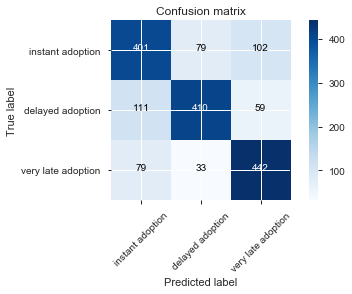

In [25]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### KNN Classifier

In [26]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': [5,10,20],'weights':['uniform','distance']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    knn_clf = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    knn_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(knn_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = knn_clf.cv_results_['mean_test_score']
    stds = knn_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, knn_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = knn_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'n_neighbors': 20, 'weights': 'distance'}

Grid scores on Train set:

0.479 (+/-0.011) for {'n_neighbors': 5, 'weights': 'uniform'}
0.641 (+/-0.012) for {'n_neighbors': 5, 'weights': 'distance'}
0.472 (+/-0.015) for {'n_neighbors': 10, 'weights': 'uniform'}
0.642 (+/-0.011) for {'n_neighbors': 10, 'weights': 'distance'}
0.459 (+/-0.039) for {'n_neighbors': 20, 'weights': 'uniform'}
0.652 (+/-0.028) for {'n_neighbors': 20, 'weights': 'distance'}

Detailed classification report on Test Set:
                    precision    recall  f1-score   support

  instant adoption       0.66      0.73      0.69       580
  delayed adoption       0.64      0.60      0.62       582
very late adoption       0.72      0.68      0.70       554

          accuracy                           0.67      1716
         macro avg       0.67      0.67      0.67      1716
      weighted avg       0.67      0.67      0.67      1716




Confusion matrix, without normalization


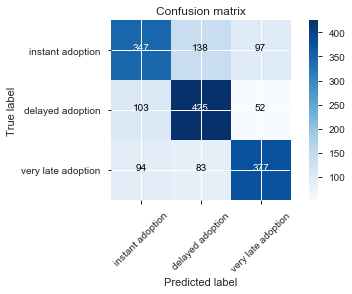

In [27]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Adaboost Classifier

In [28]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [29]:
ada_clf.fit(X_train, y_train)
scores = cross_val_score(ada_clf, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.50 (+/- 0.03)


In [30]:
pred = ada_clf.predict(X_test)
print(classification_report(y_test, pred,target_names=labels))

                    precision    recall  f1-score   support

  instant adoption       0.46      0.38      0.42       580
  delayed adoption       0.49      0.53      0.51       582
very late adoption       0.52      0.57      0.54       554

          accuracy                           0.49      1716
         macro avg       0.49      0.49      0.49      1716
      weighted avg       0.49      0.49      0.49      1716



Confusion matrix, without normalization


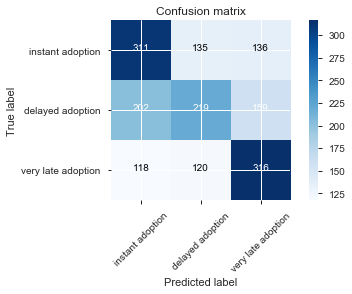

In [31]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

## 1.3. Classification - Results and Discussion 

The best result in this case of multi-class classification is from Random Forest Classifier. It also gives best results against precision, recall, support and confusion matrix.
This time the results are not as well as binary class classification because predicting multiple classes is a tough task but still the results is good enough for prediction task.
In this task we have also performed best transformations on our input data to make it good and useful for ML Algorithm.
Cross validation and other hyper parameter tuning is also performed here.